<a href="https://colab.research.google.com/github/gsurbhi792-a11y/TestProject/blob/main/Surbhi_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***My Fist ML project***

1. #***Load Data***

In [2]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
print(df)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]


2. **Data Preparation**

### ***Data separation as X and Y***

In [5]:
y=df['logS']
x=df.drop('logS',axis=1)


###***Data Splitting***

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)



##***Model Bulding***

## ***Linear Regression***

In [13]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

### **Apply model to make prediction**

In [15]:
y_lr_train_pred = lr.predict(x_train)  #recall measure
y_lr_test_pred = lr.predict(x_test)
print(y_lr_train_pred)

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

**Evaluate model performance**

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

print(lr_train_r2,lr_train_mse)

0.7645051774663391 1.0075362951093687


In [22]:

lr_results = pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Method','Training MSE', 'Training R2', 'Test MSE','Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest Model**

### **Train the model**

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=2, random_state=100)

rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Apply the model**

In [24]:
y_rf_train_pred = rf.predict(x_train)  #recall measure
y_rf_test_pred = rf.predict(x_test)
print(y_rf_train_pred)

[-4.44388581 -1.40132433 -1.41481453 -1.41481453 -1.44411435 -2.67492782
 -2.50755276 -3.95611327 -4.62529592 -2.27343298 -2.69241199 -4.5150244
 -1.41481453 -2.67492782 -7.14501987 -2.30422396 -4.0676017  -3.36086239
 -2.53282364 -4.5150244  -2.47178242 -4.0676017  -2.66143763 -1.42912192
 -1.2164651  -7.14501987 -2.67492782 -2.47178242 -7.14501987 -1.2164651
 -4.5150244  -1.2164651  -7.14501987 -1.41481453 -1.64246378 -4.5150244
 -4.5150244  -1.41481453 -2.71012897 -1.64246378 -2.42959807 -2.89446137
 -2.47178242 -1.24495146 -2.69241199 -1.2164651  -1.2164651  -4.65157679
 -2.6279475  -1.2164651  -1.79134844 -4.5150244  -1.2164651  -4.44388581
 -4.62529592 -4.0676017  -4.5150244  -2.66143763 -1.41481453 -4.0676017
 -2.67492782 -1.40132433 -3.32568382 -2.51725697 -4.44388581 -7.14501987
 -7.14501987 -1.44411435 -4.5150244  -1.42961706 -1.74496555 -2.67492782
 -1.2164651  -1.5451346  -1.44411435 -4.65157679 -4.0676017  -1.2164651
 -4.5150244  -2.39838248 -2.66143763 -1.40132433 -4.5150

### **Evaluate the model**

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [33]:
rf_results = pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Method','Training MSE', 'Training R2', 'Test MSE', 'Test R2']

print(rf_results)


          Method Training MSE Training R2  Test MSE   Test R2
0  Random Forest     1.028228    0.759669  1.407688  0.709223


# **Model comparison**

In [37]:
final_results = pd.concat([lr_results,rf_results],axis=0).reset_index(drop=True)
final_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Data Visualization**

Text(0, 0.5, 'Predicted logS')

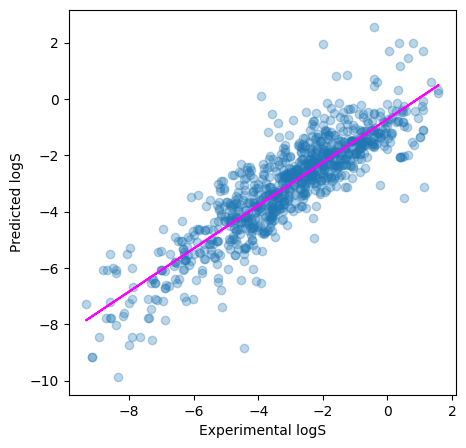

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_pred, alpha=0.3) #alpha 0.3 will help in having the highly overrlapaping predictions in the darker color and remaining in the lighter color

z= np.polyfit(y_train,y_lr_train_pred,1)
p= np.poly1d(z)

plt.plot(y_train,p(y_train), color='magenta')

plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')

plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')

Text(0, 0.5, 'Predicted logS')

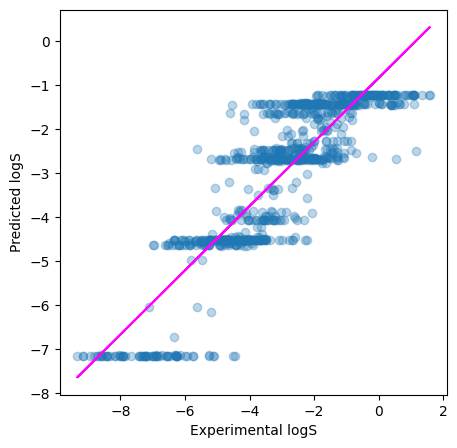

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_rf_train_pred, alpha=0.3) #alpha 0.3 will help in having the highly overrlapaping predictions in the darker color and remaining in the lighter color

z= np.polyfit(y_train,y_rf_train_pred,1)
p= np.poly1d(z)

plt.plot(y_train,p(y_train), color='magenta')

plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')

plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')